In [1]:
#------------------------------------------------------------------------
#  各種設定
#------------------------------------------------------------------------


# 対象の取引所
#exchange, currency, fee = 'Bybit',  'BTCUSD',    -0.025
#exchange, currency, fee = 'Phemex',  'BTCUSD',    -0.025
#exchange, currency, fee = 'Bitflyer','FX_BTC_JPY', 0.0
exchange, currency, fee = 'Gmo',  'BTC_JPY',    None  # Gmoの場合には個別に期間ごとの手数料を採用します

# 対象の特徴量 (作成済みモデルzipを指定すると作成済みモデルでのバックテストを行う事が出来ます)
calclate_features = 'features/richmanbtc.py'
#calclate_features = '20220218_225021_Gmo_BTC_JPY_richmanbtc.zip'


# 読み込んだローソク足のうちこの時間以降のデータを使用する
startdate = '2000-01-01 00:00:00'

# 通知先Discordの指定
webhook = ''

# ログフォルダ
log_folder = 'logs/'

# テンポラリフォルダ
temp_path = 'temp/'


In [2]:
#------------------------------------------------------------------------
# 必要なライブラリのインポート
#------------------------------------------------------------------------
%matplotlib inline

import importlib.machinery as imm
import os
import pandas as pd
import shutil

# 独自ライブラリのインポート
tools = imm.SourceFileLoader('tools', 'libs/tools.py').load_module()
machine_learning = imm.SourceFileLoader('machine_learning', 'libs/machine_learning.py').load_module()

# 初期化処理
if not 'logger' in locals() :
    logger = tools.Logger(log_folder)
discord = tools.NotifyDiscord(logger, webhook)
model = tools.Model(logger, discord)

# tempフォルダを空にする
try:
    shutil.rmtree(temp_path)
except:
    pass
try:
    if not os.path.exists(temp_path):
        os.makedirs(temp_path)
except:
    pass

2022-02-23 21:10:01.916: 読込済みローソク足データ : Gmo_BTC_JPY
[2018-09-05 17:05:00+09:00 ~ 2022-02-23 07:58:00+09:00]  60秒足  1823934 本 (1266.6日)
2022-02-23 21:10:01.925: 特徴量作成ファイルを読み込みました: features/richmanbtc.py
2022-02-23 21:10:02.072: 変換済みローソク足データ : [2018-09-05 17:00:00+09:00 ~ 2022-02-23 07:45:00+09:00]  900秒足  121596 本 (1266.6日)


前回からローソク足ファイルが更新されていないので、キャッシュから読込を行いました : cache/Gmo_BTC_JPY.cache


2022-02-23 21:10:02.521: --------------------------------------------------------------------------------
2022-02-23 21:10:02.522: 指値位置の有効性評価（すべてエントリーした場合の結果）
2022-02-23 21:10:02.522: 
2022-02-23 21:10:02.523: 　買い指値のエントリー回数(毎回)： 121596 (96.0回/日)　約定回数 : 55.0回/日 　約定率 : 57.2%
2022-02-23 21:10:02.524: 　売り指値のエントリー回数(毎回)： 121596 (96.0回/日)　約定回数 : 55.0回/日 　約定率 : 57.3%
2022-02-23 21:10:02.525: 
2022-02-23 21:10:02.526: 　買いエントリーからの利益率 : +1161.9 %  (+0.917 %/日)
2022-02-23 21:10:02.528: 　売りエントリーからの利益率 : +703.7 %  (+0.556 %/日)
2022-02-23 21:10:02.528: 
2022-02-23 21:10:02.530: 　合計利益率 : +1865.7 %  (+1.473 %/日)
2022-02-23 21:10:02.530: 
2022-02-23 21:10:02.530: --------------------------------------------------------------------------------
2022-02-23 21:10:02.531: 


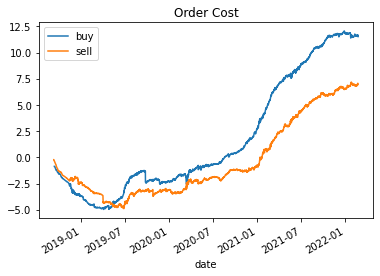

2022-02-23 21:10:02.762: --------------------------------------------------------------------------------
2022-02-23 21:10:02.763: 特徴量の計算
2022-02-23 21:10:03.088: 　　相違あり(num_of_candleが不足）： AD, [-1985.3685781026743, 439941.5946925472]
2022-02-23 21:10:03.089: 　　相違あり(num_of_candleが不足）： OBV, [-2346.6399999999826, 35749.7399999979]
2022-02-23 21:10:03.091: 計算済み特徴量 : ['HT_SINE_sine', 'HT_DCPHASE', 'DX', 'STOCHF_fastd', 'HT_TRENDLINE', 'ADOSC', 'CORREL', 'MA', 'STOCHRSI_fastk', 'LINEARREG_INTERCEPT', 'MACD_macdsignal', 'BBANDS_upperband', 'LINEARREG_SLOPE', 'ADX', 'PLUS_DI', 'TRIX', 'AROON_aroonup', 'TRANGE', 'TRIMA', 'STOCHRSI_fastd', 'BBANDS_middleband', 'RSI', 'AROONOSC', 'APO', 'STOCH_slowk', 'MINUS_DM', 'ULTOSC', 'OBV', 'MOM', 'BBANDS_lowerband', 'MFI', 'AD', 'KAMA', 'MINUS_DI', 'SMA', 'HT_PHASOR_quadrature', 'CCI', 'AROON_aroondown', 'MACD_macd', 'STOCH_slowd', 'MIDPOINT', 'HT_DCPERIOD', 'TEMA', 'ATR', 'PLUS_DM', 'BOP', 'T3', 'HT_PHASOR_inphase', 'LINEARREG_ANGLE', 'WMA', 'DEMA', 'HT_S

In [3]:
# ローソク足データの読込
df_org = machine_learning.load_candles(logger, exchange, currency, fee, startdate)

# ロジックファイル(特徴量ファイル)を読み込む
discord.send( "-"*80 + f"\n{calclate_features}" )
logic = tools.load_logic_file(calclate_features,logger)

# 指値位置の計算
df, target, ref_maker_cost = machine_learning.calc_limit_price(logger, discord, logic, df_org, model, imgfile=temp_path+"order_cost.png")

# 特徴量の計算
df,features = machine_learning.calc_features(logger, logic, df)

2022-02-23 21:10:16.571: scores : 0.9996967898272116


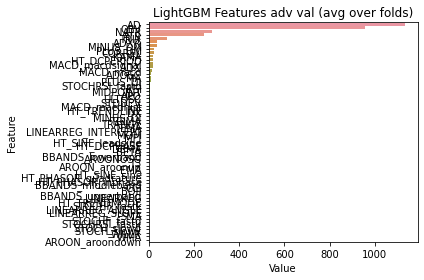

2022-02-23 21:10:17.424: 削除特徴量 : ['ATR', 'NATR', 'OBV', 'AD']
2022-02-23 21:10:19.209: scores : 0.8086469784967996
2022-02-23 21:10:19.209: 削除特徴量 : ['DEMA', 'MINUS_DI', 'ULTOSC', 'MACD_macdsignal', 'ADXR', 'PLUS_DI', 'STOCHRSI_fastd', 'MINUS_DM', 'PLUS_DM', 'ADOSC', 'TRIX']
2022-02-23 21:10:20.772: scores : 0.7071635591939021
2022-02-23 21:10:20.773: 削除特徴量 : ['MACD_macdhist', 'DX', 'CORREL', 'MACD_macd', 'KAMA', 'ADX', 'TRANGE']
2022-02-23 21:10:22.183: scores : 0.6814812739305349
2022-02-23 21:10:22.183: 削除特徴量 : ['APO', 'BOP', 'EMA', 'STDDEV', 'RSI']
2022-02-23 21:10:23.456: scores : 0.6658091672100468
2022-02-23 21:10:23.461: 削除特徴量 : ['TEMA', 'MFI', 'BBANDS_lowerband', 'MIDPOINT', 'BBANDS_upperband']
2022-02-23 21:10:24.522: scores : 0.6453607223493516
2022-02-23 21:10:24.522: 削除特徴量 : ['LINEARREG', 'MA']
2022-02-23 21:10:25.586: scores : 0.6413023520684813
2022-02-23 21:10:25.589: 削除特徴量 : ['SMA']
2022-02-23 21:10:26.606: scores : 0.6393522327186498
2022-02-23 21:10:26.607: 削除特徴量 : ['

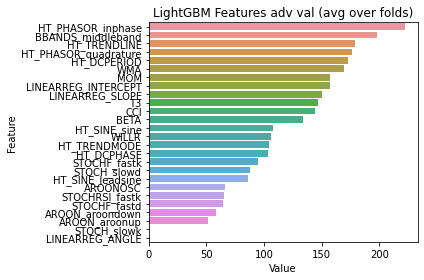

2022-02-23 21:10:27.923: 削除特徴量 : []
2022-02-23 21:10:27.923: --------------------------------------------------
2022-02-23 21:10:27.923: 重要度を考慮して削除した特徴量 : ['ATR', 'NATR', 'OBV', 'AD', 'DEMA', 'MINUS_DI', 'ULTOSC', 'MACD_macdsignal', 'ADXR', 'PLUS_DI', 'STOCHRSI_fastd', 'MINUS_DM', 'PLUS_DM', 'ADOSC', 'TRIX', 'MACD_macdhist', 'DX', 'CORREL', 'MACD_macd', 'KAMA', 'ADX', 'TRANGE', 'APO', 'BOP', 'EMA', 'STDDEV', 'RSI', 'TEMA', 'MFI', 'BBANDS_lowerband', 'MIDPOINT', 'BBANDS_upperband', 'LINEARREG', 'MA', 'SMA', 'TRIMA']
2022-02-23 21:10:27.926: 採用した特徴量 : ['AROONOSC', 'AROON_aroondown', 'AROON_aroonup', 'BBANDS_middleband', 'BETA', 'CCI', 'HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR_inphase', 'HT_PHASOR_quadrature', 'HT_SINE_leadsine', 'HT_SINE_sine', 'HT_TRENDLINE', 'HT_TRENDMODE', 'LINEARREG_ANGLE', 'LINEARREG_INTERCEPT', 'LINEARREG_SLOPE', 'MOM', 'STOCHF_fastd', 'STOCHF_fastk', 'STOCHRSI_fastk', 'STOCH_slowd', 'STOCH_slowk', 'T3', 'WILLR', 'WMA']


In [4]:
# 重要度を考慮した特徴量の削除
if calclate_features.endswith(".py") :
    delete_features = machine_learning.eliminate_features( logger, discord, df, list(set(features)-set(logic['nouse_columns'])),
                                                           repeat= 30,       # 削除処理を何回まで繰り返すか
                                                           threshold = 2.0,  # 削除する閾値 (小さいほど積極的に削除する 1.5～4.0)
                                                           goal = 0.3,       # 重要度がいくらまで減ったら終了するか
                                                           imgfile = temp_path+"importance.png" )

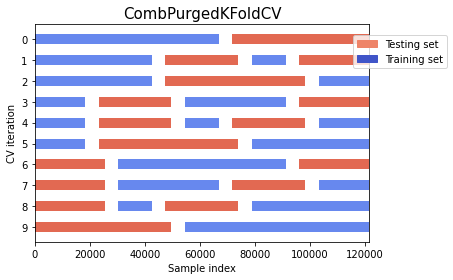

2022-02-23 21:10:45.556: --------------------------------------------------------------------------------
全区間でのクロスバリデーション評価 : 1265.7日 +2088.1 %  (+1.650 %/日)

2022-02-23 21:10:45.568: 　y_buy : +1230.6 %  (+0.972 %/日)
2022-02-23 21:10:45.606: 　y_sell : +857.5 %  (+0.678 %/日)
2022-02-23 21:10:45.677: 


クロスバリデーションの結果に沿ったバックテスト(ポジション上限無し）


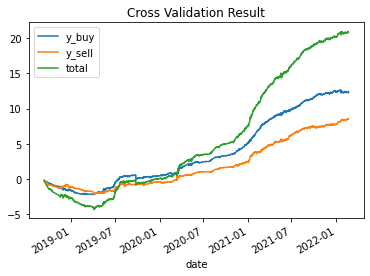

クロスバリデーションの結果に沿ったバックテスト(ポジションを上限１に制限した場合）


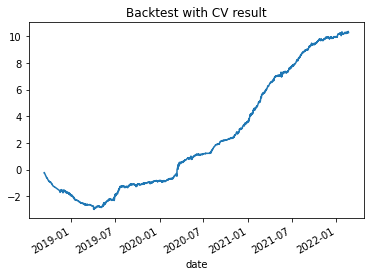

ポジションの平均の推移です。どちらかに偏りすぎていないかなどを確認できます。


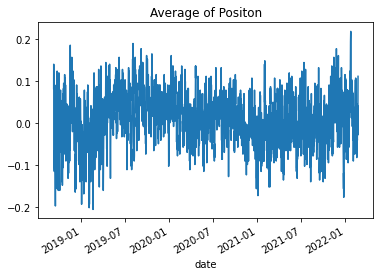

2022-02-23 21:10:46.464: t検定 （p値は小さいほうが良い結果です）
2022-02-23 21:10:46.467: t検定 :  t値 8.265096  p値 0.0000000000000001


全区間でのクロスバリデーションの結果 :  1.650%/日
参考：ルールベースでの指値コスト     :  1.473%/日
CV評価の結果はルールベースでの指値コストよりも増えていないと予測が効果的でないと考えられるので特徴量や削除条件を見直す


In [5]:
# 全区間のクロスバリデーションによる評価
if calclate_features.endswith(".py") :
    from sklearn.model_selection import KFold, TimeSeriesSplit
    profit_per_day = machine_learning.cross_validation(logger, discord, model, df,
                          # 採用する特徴量は、事前にロジックファイルで削除するよう指定されているものと、重要度によって削除することにしたものを除く
                          features = list(set(features) - set(logic['nouse_columns']) - set(delete_features)),
                          y = target,
                          #------------------------------
                          # バリデーションモデルを指定することが出来ます
#                          cvmodel = KFold(),
#                          cvmodel = TimeSeriesSplit(),
                          cvmodel = tools.CombPurgedKFoldCV(n_splits=5, n_test_splits=2, time_gap=int(len(df)/35), embargo_td=pd.Timedelta('500min')),
                          #------------------------------
                          image_path = temp_path )

    print( "全区間でのクロスバリデーションの結果 :  {:.3f}%/日".format(profit_per_day))
    print( "参考：ルールベースでの指値コスト     :  {:.3f}%/日".format(ref_maker_cost))
    print( "CV評価の結果はルールベースでの指値コストよりも増えていないと予測が効果的でないと考えられるので特徴量や削除条件を見直す" )

2022-02-23 21:10:51.503: 40%の学習区間での評価 : 評価区間での利益率 : +2.199 %/日
2022-02-23 21:10:52.533: 50%の学習区間での評価 : 評価区間での利益率 : +1.730 %/日
2022-02-23 21:10:53.608: 60%の学習区間での評価 : 評価区間での利益率 : +2.167 %/日
2022-02-23 21:10:54.714: 70%の学習区間での評価 : 評価区間での利益率 : +2.736 %/日
2022-02-23 21:10:55.904: 80%の学習区間での評価 : 評価区間での利益率 : +2.148 %/日
2022-02-23 21:10:55.905: -------------------- 70%の学習区間での評価を採用
2022-02-23 21:10:57.354: --------------------------------------------------------------------------------
2022-02-23 21:10:57.355: 学習期間 : [2018-09-06 15:00:00+09:00 ~ 2021-02-08 05:15:00+09:00]
2022-02-23 21:10:57.355: 選択特徴量 : ['AD', 'ADOSC', 'ADX', 'ADXR', 'APO', 'AROONOSC', 'AROON_aroondown', 'AROON_aroonup', 'ATR', 'BBANDS_lowerband', 'BBANDS_middleband', 'BBANDS_upperband', 'BETA', 'BOP', 'CCI', 'CORREL', 'DEMA', 'DX', 'EMA', 'HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR_inphase', 'HT_PHASOR_quadrature', 'HT_SINE_leadsine', 'HT_SINE_sine', 'HT_TRENDLINE', 'HT_TRENDMODE', 'KAMA', 'LINEARREG', 'LINEARREG_ANGLE', 'LINEAR

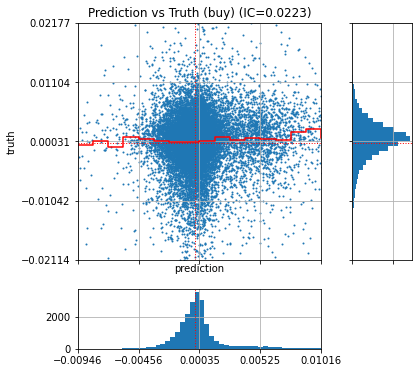

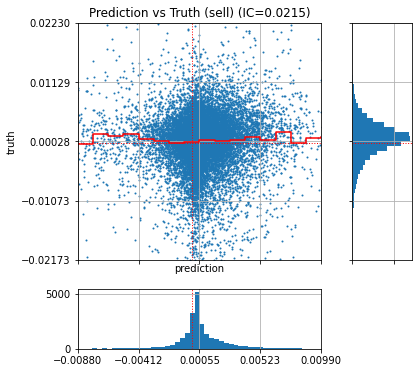

In [6]:
# 最終的なモデルの学習期間と評価期間の検討
if calclate_features.endswith(".py") :
    split_date = machine_learning.decide_period(logger, discord, df, model, features, target)
    logic['training period'] = model._training_period = str(df.index[0])+' ~ ' + str(split_date)

    # 学習区間で学習モデルの生成
    msplit_date = logic['training period'][28:]
    model.training( df[:split_date], features, target )

    # 作成したモデルを用いて評価区間を予測し、予測と結果の相関関係をプロット
    machine_learning.evaluation( logger, discord, df, model, logic, target, image_path=temp_path )

全区間でのバックテスト
    学習区間は良い結果になるのは当然で、学習期間と評価期間に大きな差が無いことを確認する


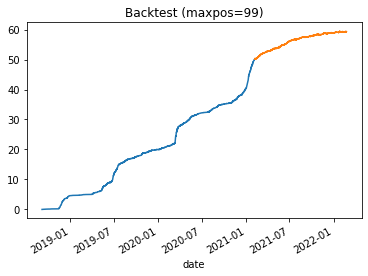

全区間でのバックテスト
    学習区間は良い結果になるのは当然で、学習期間と評価期間に大きな差が無いことを確認する


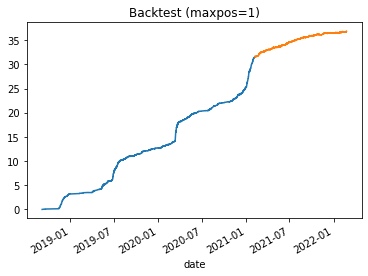

機械学習の結果に沿ってエントリーした場合と、無条件で全区間エントリーした場合の比較　（ポジションを上限1に制限した場合）


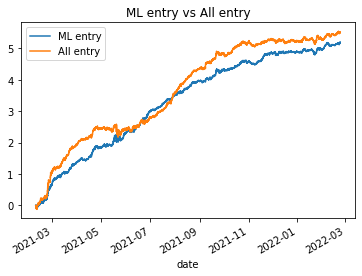

評価期間の詳細なバックテスト  (ポジションを上限1に制限した場合）
    最大DD区間や約定頻度を確認


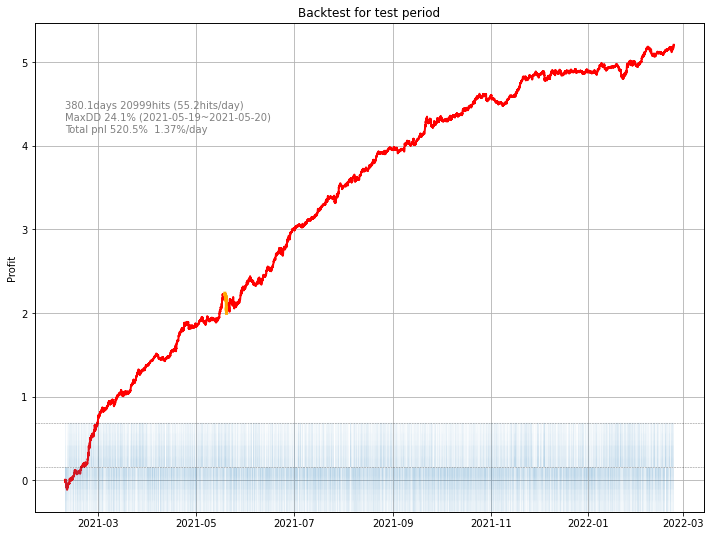

In [7]:
# バックテスト
split_date = logic['training period'][28:]
test_df, predict = model.evaluation( df[split_date:], report=False ) # 学習モデルで検査期間の評価

if calclate_features.endswith(".py") :
    train_df, predict = model.evaluation( df[:split_date], report=False ) # 学習モデルで学習期間の評価
    machine_learning.backtest_all( logger, discord, train_df, test_df, model, logic, predict, image_path=temp_path, max_pos=99 ) # 全区間でのバックテスト (ポジション上限無し)
    machine_learning.backtest_all( logger, discord, train_df, test_df, model, logic, predict, image_path=temp_path, max_pos=1 )  # 全区間でのバックテスト  (ポジションを上限１に制限した場合）
    machine_learning.backtest_ml_vs_all( logger, discord, test_df, model, logic, predict, image_path=temp_path, max_pos=1 )      # 機械学習の結果に沿ってエントリーした場合と、無条件で全区間エントリーした場合の比較
    machine_learning.backtest_detail( logger, discord, test_df, model, logic, predict, image_path=temp_path, max_pos=logic['params']['pyramiding'] ) # 評価期間の詳細なバックテスト  (ポジションを上限はパラメータで指定した値）

else:
    machine_learning.backtest_ml_vs_all( logger, discord, test_df, model, logic, predict, image_path=temp_path, days=30 )  # 機械学習の結果に沿ってエントリーした場合と、無条件で全区間エントリーした場合の比較
    machine_learning.backtest_detail( logger, discord, test_df, model, logic, predict, image_path=temp_path, days=30, max_pos=logic['params']['pyramiding'] )  # 直近30日の詳細なバックテスト  (ポジションを上限はパラメータで指定した値）


In [8]:
# 完成したモデルを zip ファイルで出力
if calclate_features.endswith(".py") :
    machine_learning.save_model_to_zip(logger, model=model, logic=logic, delete_features=delete_features,
                                       candle_file=exchange+'_'+currency, calclate_features=calclate_features,
                                       temp_path=temp_path)

2022-02-23 21:11:14.160: save model to 20220223_211114_Gmo_BTC_JPY_richmanbtc.zip
